In [40]:
from pathlib import Path
from sklearn.mixture import GaussianMixture
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Configure notebook and get raw data

In [41]:
data_path = Path("../data/MACH_data/data.cleaned.csv")
codebook_path = Path("../data/MACH_data/codebook.txt")
original_data_df = pd.read_csv(data_path)

# Choose features
Sticking to just the actual question response for now.

In [42]:
question_responses = ["Q1A", "Q2A", "Q3A", "Q4A", "Q5A", "Q6A", "Q7A", "Q8A", "Q9A", "Q10A", 
                      "Q11A", "Q12A", "Q13A", "Q14A", "Q15A", "Q16A", "Q17A", "Q18A", "Q19A", "Q20A"]
X = df[question_responses].copy()
print(f"Using features: {question_responses}  |  Shape: {X.shape}")
display(X.head())

Using features: ['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A', 'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A', 'Q20A']  |  Shape: (73489, 20)


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A
0,3.0,3.0,5.0,2.0,3.0,1.0,2.0,4.0,3.0,3.0,1.0,5.0,4.0,1.0,5.0,2.0,4.0,4.0,4.0,4.0
1,5.0,5.0,1.0,3.0,5.0,1.0,1.0,4.0,2.0,1.0,1.0,5.0,5.0,2.0,5.0,1.0,2.0,4.0,5.0,3.0
2,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0,5.0,1.0,5.0,1.0,1.0,5.0,5.0,3.0
3,2.0,4.0,2.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,1.0,5.0,1.0,1.0,4.0,1.0,1.0,5.0,3.0,4.0
4,5.0,5.0,2.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,1.0,4.0,4.0,1.0,5.0,1.0,1.0,4.0,5.0,1.0


# Data preprocessing
Scaling this data is likely not necessary since the data is usually between 1 and 5, with some NA values.

In [43]:
X_clean = X.dropna().copy()
X_clean[question_responses] = X_clean[question_responses].astype(int)
Xs = pd.DataFrame(X_clean, columns=question_responses, index=X_clean.index)
# use only 5000 random datapoints
Xs_sample = Xs.sample(n=5000, random_state=42)
print(f"After preprocessing shape: {Xs_sample.shape}")
display(Xs_sample.head())
display(Xs_sample.describe().T.round(3))

After preprocessing shape: (5000, 20)


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A
5860,2,1,3,4,4,3,2,2,3,3,3,4,5,3,5,3,1,5,4,4
61638,4,1,1,1,1,1,1,1,5,4,1,5,1,4,5,1,5,1,5,2
33684,5,5,2,3,5,2,2,2,1,4,1,5,4,2,3,2,2,5,5,5
32572,2,4,3,4,2,3,4,2,3,5,1,5,2,1,2,2,1,4,5,4
2493,2,4,4,2,3,3,3,4,5,4,2,2,1,2,3,3,2,4,3,4


,count,mean,std,min,25%,50%,75%,max
Q1A,5000.0,3.318,1.516,1.0,2.0,4.0,5.0,5.0
Q2A,5000.0,3.312,1.473,1.0,2.0,4.0,5.0,5.0
Q3A,5000.0,2.800,1.432,1.0,2.0,3.0,4.0,5.0
Q4A,5000.0,2.766,1.416,1.0,1.0,3.0,4.0,5.0
Q5A,5000.0,3.626,1.346,1.0,3.0,4.0,5.0,5.0
Q6A,5000.0,2.597,1.482,1.0,1.0,2.0,4.0,5.0
Q7A,5000.0,2.148,1.358,1.0,1.0,2.0,3.0,5.0
Q8A,5000.0,3.130,1.481,1.0,2.0,4.0,4.0,5.0
Q9A,5000.0,3.769,1.404,1.0,3.0,4.0,5.0,5.0
Q10A,5000.0,3.135,1.501,1.0,2.0,3.0,5.0,5.0


# Cluster

In [44]:
k_range = range(2, 7)
for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=0)
    clusters = gmm.fit_predict(Xs_sample)

    # get silhoutte score
    sil = silhouette_score(Xs_sample, clusters)
    print(f"Silhouette Score for k={k}: {sil}")

Silhouette Score for k=2: 0.0563075009884438
Silhouette Score for k=3: 0.04647858860233686
Silhouette Score for k=4: 0.033313544046462105
Silhouette Score for k=5: -0.003924384155173875
Silhouette Score for k=6: -0.002982571943620897


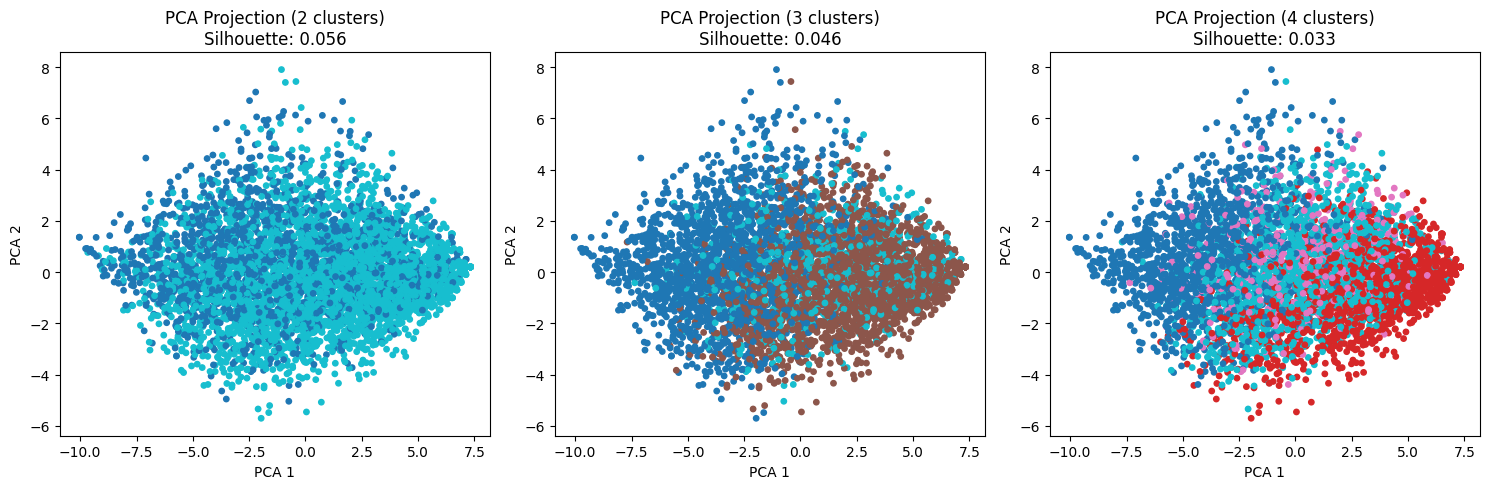

In [45]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xs_sample)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, k in enumerate([2, 3, 4]):
    gmm = GaussianMixture(n_components=k, random_state=0)
    labels = gmm.fit_predict(Xs_sample)
    score = silhouette_score(Xs_sample, labels)
    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="tab10", s=15)
    axes[i].set_title(f"PCA Projection ({k} clusters)\nSilhouette: {score:.3f}")
    axes[i].set_xlabel("PCA 1")
    axes[i].set_ylabel("PCA 2")
plt.tight_layout()
plt.show()

# Analyze cluster mean responses

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A
Cluster,,,,,,,,,,,,,,,,,,,,
0,2.443954,2.491441,3.568194,3.474324,3.035340,3.588625,3.034235,2.563777,5.000000,4.009939,2.138597,2.961347,2.168415,2.652126,2.754279,3.290447,2.686913,2.852015,3.867477,1.944230
1,3.861269,3.829129,2.284784,2.300651,4.009357,1.951180,1.549634,3.500814,3.093979,2.593572,1.417819,4.176973,3.435720,1.722132,3.896257,1.977217,2.070789,4.059398,5.000000,2.726607
2,3.656635,3.608755,2.629275,2.578659,3.800274,2.313269,1.964432,3.287278,2.989056,2.785226,1.768810,3.920657,3.058824,1.995896,3.655267,2.435021,2.402189,3.759234,3.199726,2.590971


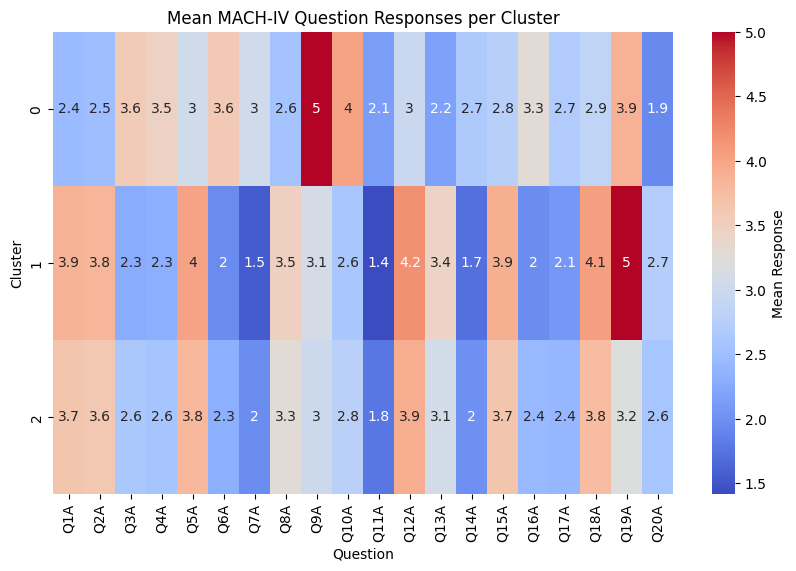

In [46]:
gmm = GaussianMixture(n_components=3, random_state=0)
labels = gmm.fit_predict(Xs_sample)
df = Xs_sample.copy()
df["Cluster"] = labels

cluster_means = df.groupby("Cluster").mean()
display(cluster_means)

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap="coolwarm", cbar_kws={"label": "Mean Response"})
plt.title("Mean MACH-IV Question Responses per Cluster")
plt.xlabel("Question")
plt.ylabel("Cluster")
plt.show()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A
Cluster,,,,,,,,,,,,,,,,,,,,
0,1,1,5,4,4,5,2,1,5,5,1,1,1,1,1,5,1,1,5,1
1,5,5,1,1,5,1,1,5,4,1,1,5,5,1,5,1,1,5,5,1
2,5,4,2,2,4,1,1,4,4,2,1,5,4,1,4,1,1,4,4,1


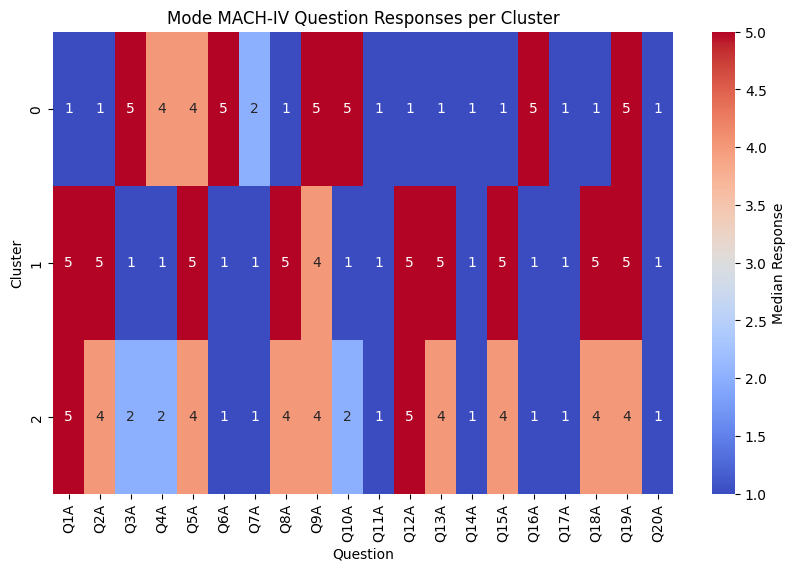

In [47]:
cluster_modes = df.groupby("Cluster")[question_responses] \
                  .agg(lambda x: x.mode().iloc[0]) # first mode
display(cluster_modes)

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_modes, annot=True, cmap="coolwarm", cbar_kws={"label": "Median Response"})
plt.title("Mode MACH-IV Question Responses per Cluster")
plt.xlabel("Question")
plt.ylabel("Cluster")
plt.show()

# Check for patterns with other columns

In [48]:
other_responses = ["TIPI1","TIPI2","TIPI3","TIPI4","TIPI5","TIPI6","TIPI7","TIPI8","TIPI9","TIPI10",
                   "VCL1","VCL2","VCL3","VCL4","VCL5","VCL6","VCL7","VCL8","VCL9","VCL10", "VCL11","VCL12","VCL13","VCL14","VCL15", "VCL16",
                   "education", "urban", "gender", "engnat", "age", "hand", "religion", "orientation", "race", "voted", "married", "familysize", "major"]

# remove major for now
other_responses.remove("major")

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
Cluster,,,,,,,,,,,,,,,,,,,,,
0.0,0.609056,0.557940,0.766033,0.584287,0.821093,0.648734,0.815493,0.465962,0.690148,0.370435,...,0.529542,0.666207,0.000020,0.377692,0.426744,0.259746,0.720991,0.741579,0.497515,0.114140
0.5,0.552424,0.697315,0.724922,0.554806,0.805242,0.648437,0.636348,0.525282,0.664013,0.373126,...,0.463656,0.694264,0.000015,0.397206,0.327468,0.281367,0.737650,0.783767,0.420532,0.100912
1.0,0.569865,0.647059,0.696697,0.562439,0.777799,0.661130,0.671292,0.520618,0.668165,0.397108,...,0.459644,0.747606,0.001382,0.393981,0.408915,0.254993,0.668947,0.784542,0.417693,0.106931


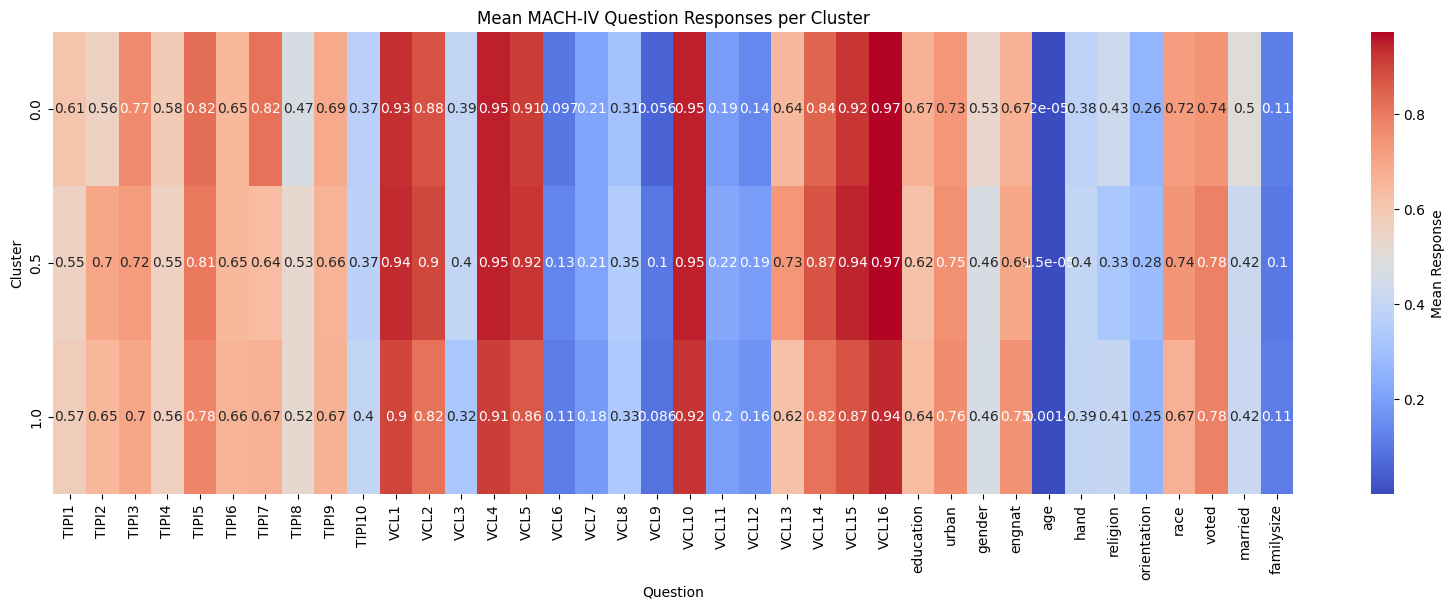

In [49]:
gmm = GaussianMixture(n_components=3, random_state=0)
labels = gmm.fit_predict(Xs_sample)
Xs_sample_with_other_responses = original_data_df.loc[Xs_sample.index]
df = pd.DataFrame(Xs_sample_with_other_responses, columns=other_responses, index=Xs_sample_with_other_responses.index)
df["Cluster"] = labels

scaler = MinMaxScaler()
normalized_df = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns,
    index=df.index
)

cluster_means = normalized_df.dropna().groupby("Cluster").mean()
display(cluster_means)

plt.figure(figsize=(20, 6))
sns.heatmap(cluster_means, annot=True, cmap="coolwarm", cbar_kws={"label": "Mean Response"})
plt.title("Mean MACH-IV Question Responses per Cluster")
plt.xlabel("Question")
plt.ylabel("Cluster")
plt.show()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
Cluster,,,,,,,,,,,,,,,,,,,,,
0.0,0.857143,0.714286,0.857143,0.714286,1.000000,0.857143,1.000000,0.142857,0.857143,0.142857,...,0.666667,0.5,0.000005,0.333333,0.083333,0.2,0.857143,0.5,0.333333,0.083333
0.5,0.857143,0.714286,0.857143,0.714286,1.000000,1.000000,0.714286,0.714286,0.857143,0.142857,...,0.333333,0.5,0.000005,0.333333,0.166667,0.2,0.857143,1.0,0.333333,0.083333
1.0,0.857143,0.714286,0.857143,0.714286,0.857143,0.714286,0.714286,0.714286,0.857143,0.142857,...,0.333333,1.0,0.000006,0.333333,0.083333,0.2,0.857143,1.0,0.333333,0.083333


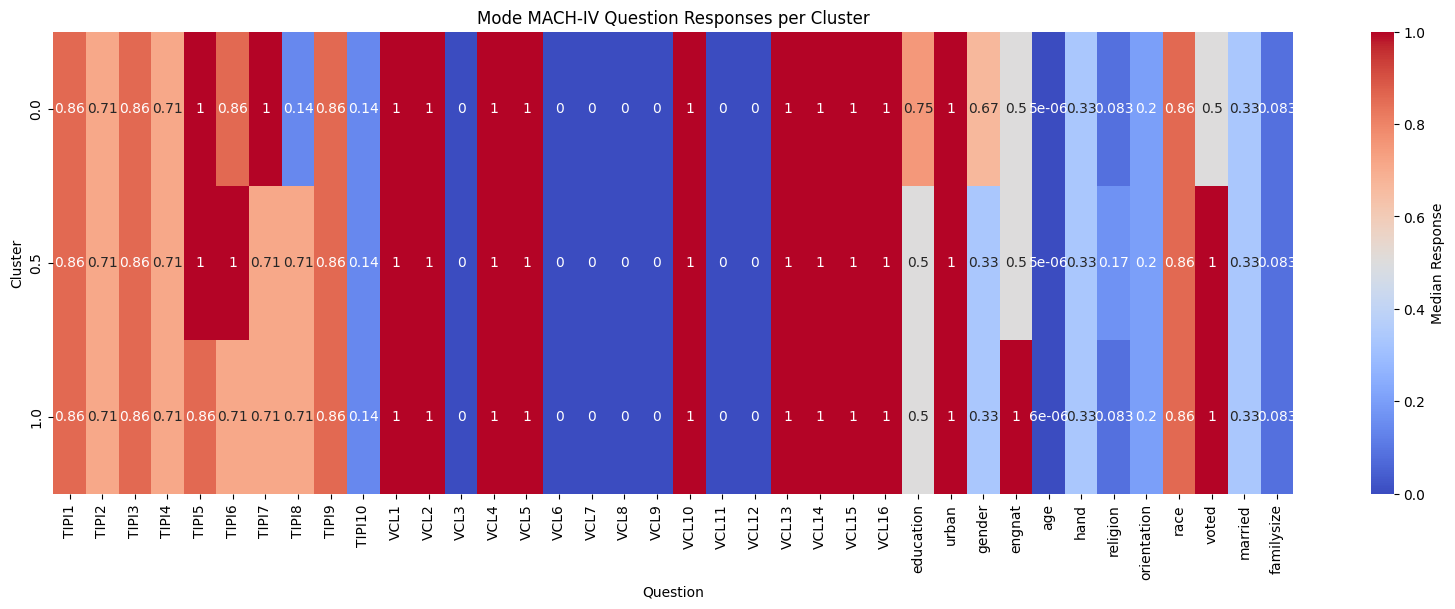

In [50]:
cluster_modes = normalized_df.groupby("Cluster")[other_responses] \
                  .agg(lambda x: x.mode().iloc[0]) # first mode
display(cluster_modes)

plt.figure(figsize=(20, 6))
sns.heatmap(cluster_modes, annot=True, cmap="coolwarm", cbar_kws={"label": "Median Response"})
plt.title("Mode MACH-IV Question Responses per Cluster")
plt.xlabel("Question")
plt.ylabel("Cluster")
plt.show()